# Soluciones a los ejercicios del Capítulo 4

## 4.1 Introducción a la librería PyBDM

### Listados de código

In [1]:
import numpy as np
from pybdm import BDM

s = "010101010101010101" #La cadena del ejemplo 3.1
s_array = np.array(list(s), dtype=int) # Convertimos a arreglo

In [2]:
# El argumento ndim especifica la dimensionalidad del objeto BMD
bdm = BDM(ndim=1)
# Computar BDM
bdm_value = bdm.bdm(s_array)
# Tambien se puede computar la entropia de Shannon base 2
entropy_value = bdm.ent(s_array)

print(round(bdm_value, 2), round(entropy_value, 2))

26.99 0.0


In [3]:
import numpy as np
from pybdm import BDM
# Importamos las diferentes clases de particion
from pybdm import PartitionIgnore, PartitionRecursive, PartitionCorrelated

s = "010101010101010101" # La cadena del Ejemplo 3.1
s_array = np.array(list(s), dtype=int) # Convertimos a arreglo

# Default
bdm_ignore = BDM(ndim=1, partition=PartitionIgnore)

#Particion recursiva
#El argumento min_length especifica el tamano minimo 
#de bloque a alcanzar en la particion
bdm_recursive = BDM(ndim=1, partition=PartitionRecursive, min_length=2)

#Particion correlacionada
bdm_correlated = BDM(ndim=1, partition=PartitionCorrelated)
# Tamano de paso m igual a 1 por default, 
# equivalente a
#bdm_correlated = BDM(ndim=1, partition=PartitionCorrelated, shift=1)

bdm_value = bdm_correlated.bdm(s_array)
print(round(bdm_value,3))

57.566


### Ejercicio 4.1

In [4]:
from pybdm import BDM,PartitionCorrelated
import numpy as np
from itertools import permutations
import statistics as st
from prettytable import PrettyTable


def string_list_concatenation(str_list):
    """Esta función concatena una lista de 
    cadenas de caracteres en una sola cadena"""
    concat_str = ""
    for string in str_list:
        concat_str += string
    return concat_str


s_a = 12*'1'
s_b = 6*'01'
s_0 = 12*'0'
s_list = [s_a,s_b,s_0] # Lista a permutar

# Se construye lista de valores permitidos de m
L,l = 36,12 #Longitud de cadena y tamaño de bloque
m_list = []
for i in range((L-l)-1,0,-1):
    if (L-l)%i == 0:
        m_list.append(i)


x = PrettyTable()# Tabla de valores BDM
permutation_nb,permutations_nb_list = 1,[]
bdm_ignore = BDM(ndim=1)
bdm_ignore_values = []
for i in list(permutations(s_list)):
    permutations_nb_list.append(str(permutation_nb))
    permutation_array = np.array(list(string_list_concatenation(i)), dtype=int)
    bdm_ignore_values.append(round(bdm_ignore.bdm(permutation_array),3))
    permutation_nb += 1
x.add_column("Permutacion", permutations_nb_list)
x.add_column("BDM (ignora sobras)", bdm_ignore_values)

y = PrettyTable()# Tabla de desviaciones estandar
y.field_names = ["m", "Desv. est. rel. (%)"]
for m in m_list:
    bdm_correlated = BDM(ndim=1, partition=PartitionCorrelated, shift=m)
    bdm_correlated_values = []

    for i in list(permutations(s_list)):
        permutation_array = np.array(list(string_list_concatenation(i)), dtype=int)
        bdm_correlated_values.append(round(bdm_correlated.bdm(permutation_array),3))

    x.add_column(f"BDM (correlacionada, m = {m})", bdm_correlated_values)
    
    sd_dev = st.stdev(bdm_correlated_values)
    rel_sd_dev = 100*sd_dev/st.mean(bdm_correlated_values)
    y.add_row([m, round(rel_sd_dev,2)])

In [5]:
print(x)

+-------------+---------------------+------------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+
| Permutacion | BDM (ignora sobras) | BDM (correlacionada, m = 12) | BDM (correlacionada, m = 8) | BDM (correlacionada, m = 6) | BDM (correlacionada, m = 4) | BDM (correlacionada, m = 3) | BDM (correlacionada, m = 2) | BDM (correlacionada, m = 1) |
+-------------+---------------------+------------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+
|      1      |        78.212       |            78.212            |           107.323           |            137.62           |           192.545           |           255.972           |           362.238           |           683.829           |
|   

En la tabla se puede ver que los valores calculados de BDM aumentan al disminuir $m$, lo cual es de esperarse ya que el traslape aumenta.

In [6]:
print(y)

+----+---------------------+
| m  | Desv. est. rel. (%) |
+----+---------------------+
| 12 |         0.0         |
| 8  |         1.85        |
| 6  |         0.67        |
| 4  |         1.22        |
| 3  |         1.21        |
| 2  |         1.28        |
| 1  |         3.55        |
+----+---------------------+


En esta tabla se puede ver que los valores de desviación estándar relativa son poco significativos. Esto nos indica que las permutaciones tienen valores de BDM muy similares entre sí para cada valor $m$ dado, no obstante el hecho de que el traslape evita la asignación de un mismo valor BDM a permutaciones que podrían tener diferente complejidad. Esto último se debe a que la secuencia original es simple y las permutaciones no producen o eliminan patrones estadísticos o algorítmicos (vea subsección 3.3.1).

### Ejercicio 4.2

Volvemos a ejecutar el código del Ejercicio 4.1 para tres cadenas binarias aleatorias,

In [7]:
from pybdm import BDM,PartitionCorrelated
import numpy as np
from itertools import permutations
import statistics as st
from prettytable import PrettyTable
#Las tres cadenas binarias aleatorias
np.random.seed(10)
arr_a = np.random.randint(2, size=12)
arr_b = np.random.randint(2, size=12)
arr_d = np.random.randint(2, size=12)
arr_list = [arr_a, arr_b, arr_d] # Lista a permutar

# Se construye lista de valores permitidos de m
L,l = 36,12 #Longitud de cadena y tamaño de bloque
m_list = []
for i in range((L-l)-1,0,-1):
    if (L-l)%i == 0:
        m_list.append(i)


x = PrettyTable()# Tabla de valores BDM
permutation_nb,permutations_nb_list = 1,[]
bdm_ignore = BDM(ndim=1)
bdm_ignore_values = []
for i in permutations(arr_list):
    permutations_nb_list.append(str(permutation_nb))
    permutation_array = np.concatenate(i)
    bdm_ignore_values.append(round(bdm_ignore.bdm(permutation_array),3))
    permutation_nb += 1
x.add_column("Permutacion", permutations_nb_list)
x.add_column("BDM (ignora sobras)", bdm_ignore_values)

y = PrettyTable()# Tabla de desviaciones estandar
y.field_names = ["m", "Desv. est. rel. (%)"]
for m in m_list:
    bdm_correlated = BDM(ndim=1, partition=PartitionCorrelated, shift=m)
    bdm_correlated_values = []

    for i in permutations(arr_list):
        permutation_array = np.concatenate(i)
        bdm_correlated_values.append(round(bdm_correlated.bdm(permutation_array),3))

    x.add_column(f"BDM (correlacionada, m = {m})", bdm_correlated_values)
    
    sd_dev = st.stdev(bdm_correlated_values)
    rel_sd_dev = 100*sd_dev/st.mean(bdm_correlated_values)
    y.add_row([m, round(rel_sd_dev,2)])

In [8]:
print(x)

+-------------+---------------------+------------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+
| Permutacion | BDM (ignora sobras) | BDM (correlacionada, m = 12) | BDM (correlacionada, m = 8) | BDM (correlacionada, m = 6) | BDM (correlacionada, m = 4) | BDM (correlacionada, m = 3) | BDM (correlacionada, m = 2) | BDM (correlacionada, m = 1) |
+-------------+---------------------+------------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+
|      1      |        96.227       |            96.227            |           125.582           |           158.948           |           219.597           |           286.984           |           410.314           |           796.575           |
|   

In [9]:
print(y)

+----+---------------------+
| m  | Desv. est. rel. (%) |
+----+---------------------+
| 12 |         0.0         |
| 8  |         1.02        |
| 6  |         0.66        |
| 4  |         1.52        |
| 3  |         0.78        |
| 2  |         1.48        |
| 1  |         0.76        |
+----+---------------------+


Al igual que en el Ejercicio 4.1, los valores de desviación estándar relativa son poco significativos. En este caso, las permutaciones tampoco introducen o eliminan patrones estadísticos o algorítmicos al tratarse de cadenas binarias aleatorias.

## 4.2 Cadenas binarias aleatorias

### Listados de código

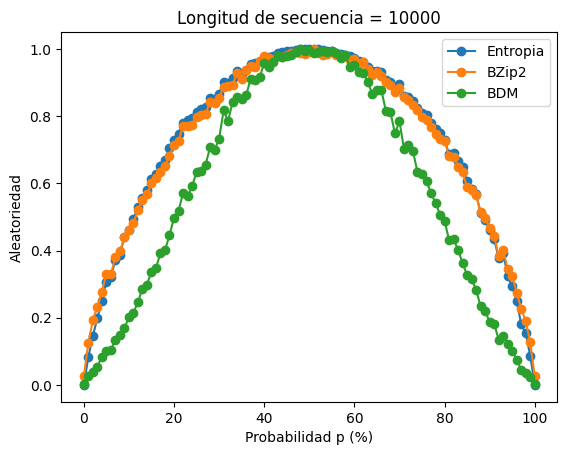

In [10]:
from math import log2
import random as rd
import numpy as np
from pybdm import BDM
from matplotlib import pyplot as plt
import bz2 # Libreria BZip2

def entropy(array):
    """Esta funcion calcula la entropia 
    de un arreglo binario"""
    H = 0.0
    p = np.count_nonzero(array) / len(array)
    if p != 0.0 and p != 1.0:
        H -= (p*log2(p) + (1.0-p)*log2(1.0 - p))
    return H


def biased_coin(p):
    """Esta funcion simula una moneda sesgada
    con probabilidad p de caer en aguila (1)"""
    rd_x = rd.random()
    if 0 <= rd_x and rd_x <= p:
        return 1
    else:
        return 0
    
 
def bernoulli_essay(str_len, p):
    """Esta funcion devuelve una simulacion 
    de str_len lanzamientos con una p-moneda 
    sesgada, en formato de arreglo"""
    return np.array([biased_coin(p) for i in range(str_len)])


def arr_to_string(arr):
    """Esta funcion convierte un arreglo a 
    cadena de caracteres"""
    a_str = ""
    for nb in arr:
        a_str += str(nb)
    return a_str

bdm = BDM(ndim=1)

#PASO 1
str_len = 10000 

#PASO 2
nb_arrays = 101
bin_arrs = np.array([bernoulli_essay(str_len, f/100) 
                     for f in range(nb_arrays)])

#PASO 3
arrs_bdm = np.array([bdm.bdm(arr) for arr in bin_arrs])
arrs_H = np.array([entropy(arr) for arr in bin_arrs])

arrs_zip = np.zeros(nb_arrays, float)
for i in range(nb_arrays):
    a_string = bytes(arr_to_string(bin_arrs[i]), 'ascii')
    comp_string = bz2.compress(a_string)
    arrs_zip[i] = len(comp_string)
#normalizacion
arrs_zip /= max(arrs_zip)   
arrs_bdm /= max(arrs_bdm)

#PASO 4
plt.plot(range(nb_arrays), arrs_H, "-o", label="Entropia")
plt.plot(range(nb_arrays), arrs_zip, "-o", label="BZip2")
plt.plot(range(nb_arrays), arrs_bdm, "-o", label="BDM")
plt.title(f"Longitud de secuencia = {str_len}")
plt.xlabel("Probabilidad p (%)")
plt.ylabel("Aleatoriedad")
plt.legend()
plt.show()

### Ejercicio 4.3

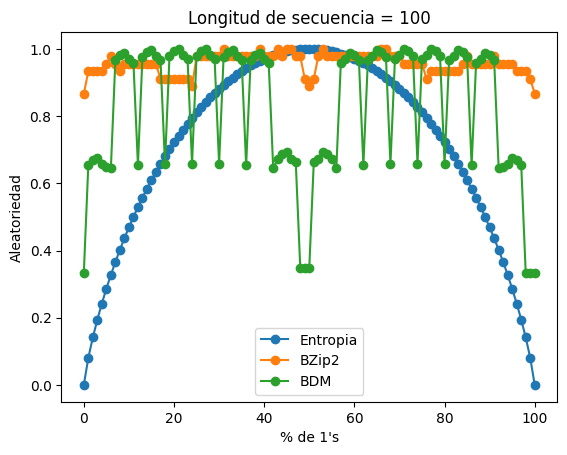

In [11]:
from math import log2
import random as rd
import numpy as np
from pybdm import BDM
from matplotlib import pyplot as plt
import bz2 # Libreria BZip2

def entropy(array):
    """Esta funcion calcula la entropia 
    de un arreglo binario"""
    H = 0.0
    p = np.count_nonzero(array) / len(array)
    if p != 0.0 and p != 1.0:
        H -= (p*log2(p) + (1.0-p)*log2(1.0 - p))
    return H


def alternate_series(str_len, nb_ones):
    """Esta funcion crea una secuencia de
    dígitos binarios alternados con cierta
    cantidad de 1's 
    """
    an_arr = np.zeros(str_len, dtype=int)
    if nb_ones <= str_len//2:
        for i in range(nb_ones):
            an_arr[2*i + 1] += 1
    else:
        for i in range(str_len//2):
            an_arr[2*i + 1] += 1
        for i in range(nb_ones - str_len//2):
            an_arr[2*i] += 1
            
    return an_arr


def arr_to_string(arr):
    """Esta funcion convierte un arreglo a 
    cadena de caracteres"""
    a_str = ""
    for nb in arr:
        a_str += str(nb)
    return a_str

bdm = BDM(ndim=1)

#PASO 1
str_len = 100

#PASO 2
nb_arrays = 101
bin_arrs = np.array([alternate_series(str_len, str_len*f//100) 
                     for f in range(nb_arrays)])

#PASO 3
arrs_bdm = np.array([bdm.bdm(arr) for arr in bin_arrs])
arrs_H = np.array([entropy(arr) for arr in bin_arrs])

arrs_zip = np.zeros(nb_arrays, float)
for i in range(nb_arrays):
    a_string = bytes(arr_to_string(bin_arrs[i]), 'ascii')
    comp_string = bz2.compress(a_string)
    arrs_zip[i] = len(comp_string)
#normalizacion
arrs_zip /= max(arrs_zip)   
arrs_bdm /= max(arrs_bdm)

#PASO 4
plt.plot(range(nb_arrays), arrs_H, "-o", label="Entropia")
plt.plot(range(nb_arrays), arrs_zip, "-o", label="BZip2")
plt.plot(range(nb_arrays), arrs_bdm, "-o", label="BDM")
plt.title(f"Longitud de secuencia = {str_len}")
plt.xlabel("% de 1's")
plt.ylabel("Aleatoriedad")
plt.legend()
plt.show()

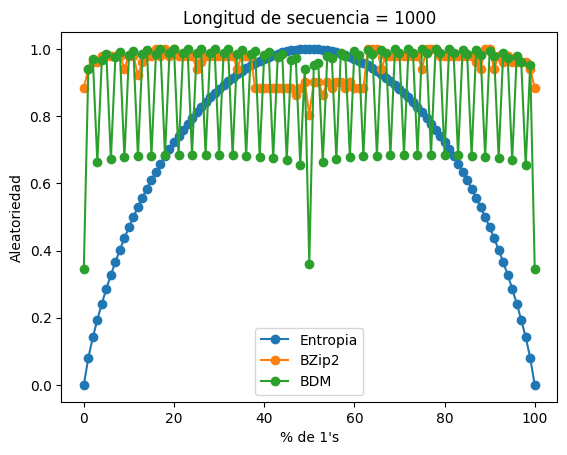

In [12]:
#PASO 1
str_len = 1000

#PASO 2
nb_arrays = 101
bin_arrs = np.array([alternate_series(str_len, str_len*f//100) 
                     for f in range(nb_arrays)])

#PASO 3
arrs_bdm = np.array([bdm.bdm(arr) for arr in bin_arrs])
arrs_H = np.array([entropy(arr) for arr in bin_arrs])

arrs_zip = np.zeros(nb_arrays, float)
for i in range(nb_arrays):
    a_string = bytes(arr_to_string(bin_arrs[i]), 'ascii')
    comp_string = bz2.compress(a_string)
    arrs_zip[i] = len(comp_string)
#normalizacion
arrs_zip /= max(arrs_zip)   
arrs_bdm /= max(arrs_bdm)

#PASO 4
plt.plot(range(nb_arrays), arrs_H, "-o", label="Entropia")
plt.plot(range(nb_arrays), arrs_zip, "-o", label="BZip2")
plt.plot(range(nb_arrays), arrs_bdm, "-o", label="BDM")
plt.title(f"Longitud de secuencia = {str_len}")
plt.xlabel("% de 1's")
plt.ylabel("Aleatoriedad")
plt.legend()
plt.show()

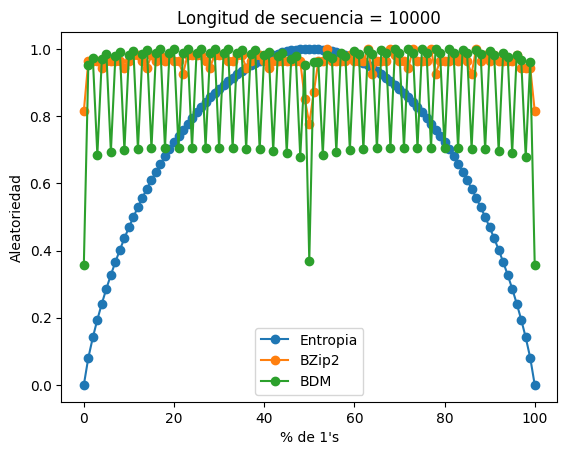

In [13]:
#PASO 1
str_len = 10000

#PASO 2
nb_arrays = 101
bin_arrs = np.array([alternate_series(str_len, str_len*f//100) 
                     for f in range(nb_arrays)])

#PASO 3
arrs_bdm = np.array([bdm.bdm(arr) for arr in bin_arrs])
arrs_H = np.array([entropy(arr) for arr in bin_arrs])

arrs_zip = np.zeros(nb_arrays, float)
for i in range(nb_arrays):
    a_string = bytes(arr_to_string(bin_arrs[i]), 'ascii')
    comp_string = bz2.compress(a_string)
    arrs_zip[i] = len(comp_string)
#normalizacion
arrs_zip /= max(arrs_zip)   
arrs_bdm /= max(arrs_bdm)

#PASO 4
plt.plot(range(nb_arrays), arrs_H, "-o", label="Entropia")
plt.plot(range(nb_arrays), arrs_zip, "-o", label="BZip2")
plt.plot(range(nb_arrays), arrs_bdm, "-o", label="BDM")
plt.title(f"Longitud de secuencia = {str_len}")
plt.xlabel("% de 1's")
plt.ylabel("Aleatoriedad")
plt.legend()
plt.show()

Se pueden destacar las siguientes observaciones:
* La gráfica de entropía no cambia al aumentar la longitud de secuencia. Esto se debe a que la entropía se calcula en función de las frecuencias relativas -en este caso de dígitos binarios, independientemente de la longitud de secuencia.
* Las gráficas de complejidad algorítmica (BDM) son simétricas. Esto se debe a que las cadenas con porcentaje de 1s mayor a 50% son el complemento binario de las cadenas con porcentaje de 1s menor o igual a 50%.
* Aunque la CA no es menor a la entropía en todo el dominio de porcentaje de 1's, se puede notar que el BDM puede reconocer el carácter algorítmico de una parte considerable de las cadenas alternadas -de hecho, BDM asigna el valor mínimo de aleatoriedad a las tres cadenas más "sencillas"; a saber, la cadena "000...000", la cadena "111...111" y la cadena perfectamente alternada "0101...0101"
* El BDM sigue siendo más efectivo que la compresibilidad (por BZip2) para comprimir las cadenas alternadas.

## 4.3 Secuencia Thue-Morse

### Listados de código

c:\Users\Manuel\Documents\AIT_guia\.venv\Lib\site-packages\pybdm\bdm.py:491: RuntimeWarning: invalid value encountered in scalar divide
  ent = (ent - min_ent) / (max_ent - min_ent)


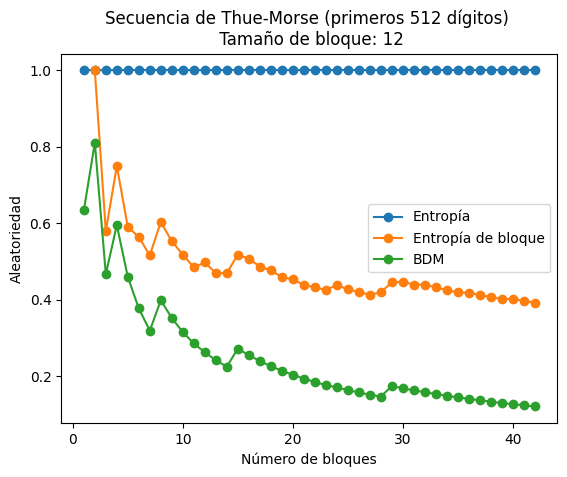

In [14]:
import numpy as np
from pybdm import BDM
from pybdm import PartitionIgnore, PartitionRecursive, PartitionCorrelated
from math import log2
from matplotlib import pyplot as plt


def binary_complement(b_arr):
    return [(digit+1)%2 for digit in b_arr]

#Ejercicio 4.4
def thue_morse_seq(n):
    if n > 0:
        seq = thue_morse_seq(n-1)
        return seq + binary_complement(seq)
    elif n == 0:
        return [0]

#Ejercicio 2.1
def entropy(p_dist):
    I = 0.0
    for p in p_dist:
        if p != 0:
            I += (-p*log2(p))
    return I

def freq_dist_dict(a_string, block_length):
    """
    Esta funcion devuelve un diccionario cuyas claves son los bloques sin repetir de a_string, 
    y cuyos valores son las frecuencias de aparición de dichos bloques dentro de a_string
    """
    nb_blocks = int(len(a_string) / block_length)
    freq_dictionary = {}
    # Inicializamos el diccionario con valores igual a cero
    index = 0
    for k in range(nb_blocks):
        block = a_string[index:index+block_length]
        freq_dictionary[block] = 0.0
        index += block_length
    # Contamos las apariciones de los bloques y las registramos en los respectivos valores 
    index = 0
    for k in range(nb_blocks):
        block = a_string[index:index + block_length]
        freq_dictionary[block] += 1.0
        index += block_length

    return freq_dictionary


def block_entropy(a_string, block_length=1):
    """Esta función calcula la entropía de bloque para la cadena a_string
    en función del tamaño de bloque
    """
    freq_dictionary = freq_dist_dict(a_string, block_length) # Diccionario de frecuencias
    freq_array = np.array(list(freq_dictionary.values())) # Extraemos los valores de frecuencia en un arreglo 
    p_dist = freq_array/sum(freq_array) # Normalizamos el arreglo de frecuencias
    return entropy(p_dist)


def nb_array_to_string(array):
    """Esta función convierte un arreglo binario
      a cadena de caracteres"""
    a_str = ""
    for n in array:
        a_str += str(n)
    
    return a_str


bdm = BDM( ndim = 1)

#PASO 1
NB_ITERATIONS = 9
NB_BLOCKS = int((2**NB_ITERATIONS)/12) 
tm_seq = np.array(thue_morse_seq(NB_ITERATIONS)) 
tm_string = nb_array_to_string(tm_seq)

#PASOS 2, 3, 4 y 5
sample_H = np.array([block_entropy(tm_string[0:(i+1)*12]) for i in range(NB_BLOCKS)])
sample_blockH = np.array([bdm.ent(tm_seq[0:(i+1)*12], normalized=True) for i in range(NB_BLOCKS)])
sample_bdm = np.array([bdm.bdm(tm_seq[0:(i+1)*12], normalized=True) for i in range(NB_BLOCKS)])

#PASO 6
plt.plot(range(1, NB_BLOCKS+1), sample_H, "-o", label="Entropía")
plt.plot(range(1, NB_BLOCKS+1), sample_blockH, "-o", label="Entropía de bloque")
plt.plot(range(1, NB_BLOCKS+1), sample_bdm, "-o", label="BDM")
plt.title("Secuencia de Thue-Morse (primeros 512 dígitos) \n Tamaño de bloque: 12")
plt.xlabel("Número de bloques")
plt.ylabel("Aleatoriedad")
plt.legend()

### Ejercicio 4.5

Ejecutamos una vez más el código del Ejercicio 4.1 para los tres primeros bloques de la secuencia Thue-Morse,

In [15]:
from pybdm import BDM,PartitionCorrelated
import numpy as np
from itertools import permutations
import statistics as st
from prettytable import PrettyTable

#función generadora de la secuencia Thue_Morse
def binary_complement(b_arr):
    return [(digit+1)%2 for digit in b_arr]

def thue_morse_seq(n):
    if n > 0:
        seq = thue_morse_seq(n-1)
        return seq + binary_complement(seq)
    elif n == 0:
        return [0]

initial_arr = thue_morse_seq(6)
arr_a = np.array(initial_arr[0:12])
arr_b = np.array(initial_arr[12:24])
arr_c = np.array(initial_arr[24:36])
arr_list = [arr_a, arr_b, arr_c] # Lista a permutar

# Se construye lista de valores permitidos de m
L,l = 36,12 #Longitud de cadena y tamaño de bloque
m_list = []
for i in range((L-l)-1,0,-1):
    if (L-l)%i == 0:
        m_list.append(i)


x = PrettyTable()# Tabla de valores BDM
permutation_nb,permutations_nb_list = 1,[]
bdm_ignore = BDM(ndim=1)
bdm_ignore_values = []
for i in permutations(arr_list):
    permutations_nb_list.append(str(permutation_nb))
    permutation_array = np.concatenate(i)
    bdm_ignore_values.append(round(bdm_ignore.bdm(permutation_array),3))
    permutation_nb += 1
x.add_column("Permutacion", permutations_nb_list)
x.add_column("BDM (ignora sobras)", bdm_ignore_values)

y = PrettyTable()# Tabla de desviaciones estandar
y.field_names = ["m", "Desv. est. rel. (%)"]
for m in m_list:
    bdm_correlated = BDM(ndim=1, partition=PartitionCorrelated, shift=m)
    bdm_correlated_values = []

    for i in permutations(arr_list):
        permutation_array = np.concatenate(i)
        bdm_correlated_values.append(round(bdm_correlated.bdm(permutation_array),3))

    x.add_column(f"BDM (correlacionada, m = {m})", bdm_correlated_values)
    
    sd_dev = st.stdev(bdm_correlated_values)
    rel_sd_dev = 100*sd_dev/st.mean(bdm_correlated_values)
    y.add_row([m, round(rel_sd_dev,2)])

In [16]:
print(x)

+-------------+---------------------+------------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+
| Permutacion | BDM (ignora sobras) | BDM (correlacionada, m = 12) | BDM (correlacionada, m = 8) | BDM (correlacionada, m = 6) | BDM (correlacionada, m = 4) | BDM (correlacionada, m = 3) | BDM (correlacionada, m = 2) | BDM (correlacionada, m = 1) |
+-------------+---------------------+------------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+-----------------------------+
|      1      |        66.805       |            66.805            |            99.939           |           133.612           |           198.878           |           265.855           |           396.303           |           795.825           |
|   

In [17]:
print(y)

+----+---------------------+
| m  | Desv. est. rel. (%) |
+----+---------------------+
| 12 |         0.0         |
| 8  |        13.59        |
| 6  |        13.78        |
| 4  |         18.7        |
| 3  |         13.7        |
| 2  |        18.64        |
| 1  |        18.81        |
+----+---------------------+


A diferencia de los ejercicios 4.1 y 4.2, en este ejercicio se puede notar que las permutaciones llegan a alterar los patrones algorítmicos o estadísticos de la serie inicial -una porción de la secuencia Thue-Morse.